<a href="https://colab.research.google.com/github/JSJeong-me/LGE-PRI-1st/blob/main/interface-agents/interface_agents_naver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Interface Agents

Interface agents address tasks by interacting with a user interface. They can be used to build systems that address tasks that are not easily accessible through an API.  


This notebook demonstrates how the `InterfaceAgent` package to address entire tasks by interacting with a user interface. The package is built on top of the `Playwright` library, which provides a high-level API to interact with web pages.





In [ ]:
!pip install interfaceagent

In [ ]:
!playwright install

In [ ]:
from google.colab import userdata
import openai
import os

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
openai.api_key  = os.environ["OPENAI_API_KEY"]

In [ ]:
from interfaceagent import WebBrowser, Planner, OpenAIPlannerModel

In [ ]:
browser = WebBrowser(start_url="http://naver.com/",headless=True) # False
model = OpenAIPlannerModel(model="gpt-4o-mini-2024-07-18")

In [ ]:
task = f"""
Here is the step-by-step English prompt to execute the described task:

Navigate to the URL:
Open the website [https://www.naver.com/].

Locate the Search Bar:
Find the search bar on the Naver homepage.

Input Search Query:
Type "선유도역 현재기온" (Seonyudo Station current temperature) into the search bar.

Execute Search:
Press the search button or hit Enter to submit the query.

Extract Current Temperature:
Wait for the search results to load, locate the section displaying the current temperature, and extract the temperature as text.
"""

In [ ]:
planner = Planner(model=model, web_browser=browser, task=task)

In [ ]:
result = await planner.run(task=task)

2024-12-02 05:13:39.974 | INFO     | interfaceagent.interface.planner:run:254 - WebBrowser not initialized. Initializing now.
2024-12-02 05:13:42.493 | INFO     | interfaceagent.interface.webbrowser:initialize:39 - WebBrowser successfully initialized.
2024-12-02 05:13:44.455 | INFO     | interfaceagent.interface.planner:generate_plan:58 - High-level plan: ['Navigate to the URL: Open the website https://www.naver.com/', 'Locate the Search Bar: Find the search bar on the Naver homepage.', "Input Search Query: Type '선유도역 현재기온' (Seonyudo Station current temperature) into the search bar.", 'Execute Search: Press the search button or hit Enter to submit the query.', 'Extract Current Temperature: Wait for the search results to load, locate the section displaying the current temperature, and extract the temperature as text.']
2024-12-02 05:14:17.484 | INFO     | interfaceagent.interface.webbrowser:get_interactive_elements:167 - Total interactive elements found: 176
2024-12-02 05:14:19.850 | IN

In [ ]:
print(result)

{'task': '\nHere is the step-by-step English prompt to execute the described task:\n\nNavigate to the URL:\nOpen the website [https://www.naver.com/].\n\nLocate the Search Bar:\nFind the search bar on the Naver homepage.\n\nInput Search Query:\nType "선유도역 현재기온" (Seonyudo Station current temperature) into the search bar.\n\nExecute Search:\nPress the search button or hit Enter to submit the query.\n\nExtract Current Temperature:\nWait for the search results to load, locate the section displaying the current temperature, and extract the temperature as text.\n', 'page_content': {'content': "메뉴 영역으로 바로가기\n본문 영역으로 바로가기\nNAVER\n한글 입력기\n자동완성 레이어\n검색\n사용자 링크\n로그인\n서비스 더보기\n블로그\n카페\n이미지\n지식iN\n인플루언서\n동영상\n쇼핑\n뉴스\n어학사전\n지도\n도서\n지식백과\n학술정보\n다음\n더보기\n공유\n선유도역 현재기온 검색 결과\n영등포구 양평동5가\n영등포구 양평동5가\n오늘\n \n내일\n \n모레\n \n월간\n \n과거\n날씨 제공사 설정\n 기상청\n \n 아큐웨더\n \n 웨더채널\n \n 웨더뉴스\n예보비교\n오늘의 날씨\n흐림\n현재 온도\n13.4°\n\n어제보다 3.9° \n높아요\n 흐림\n\n체감 13.4° 습도 70% 남서풍 1.9m/s\nCCTV\n날씨지도\n미세먼지\n보통\n \n초미세먼지\n보통\n \n자외


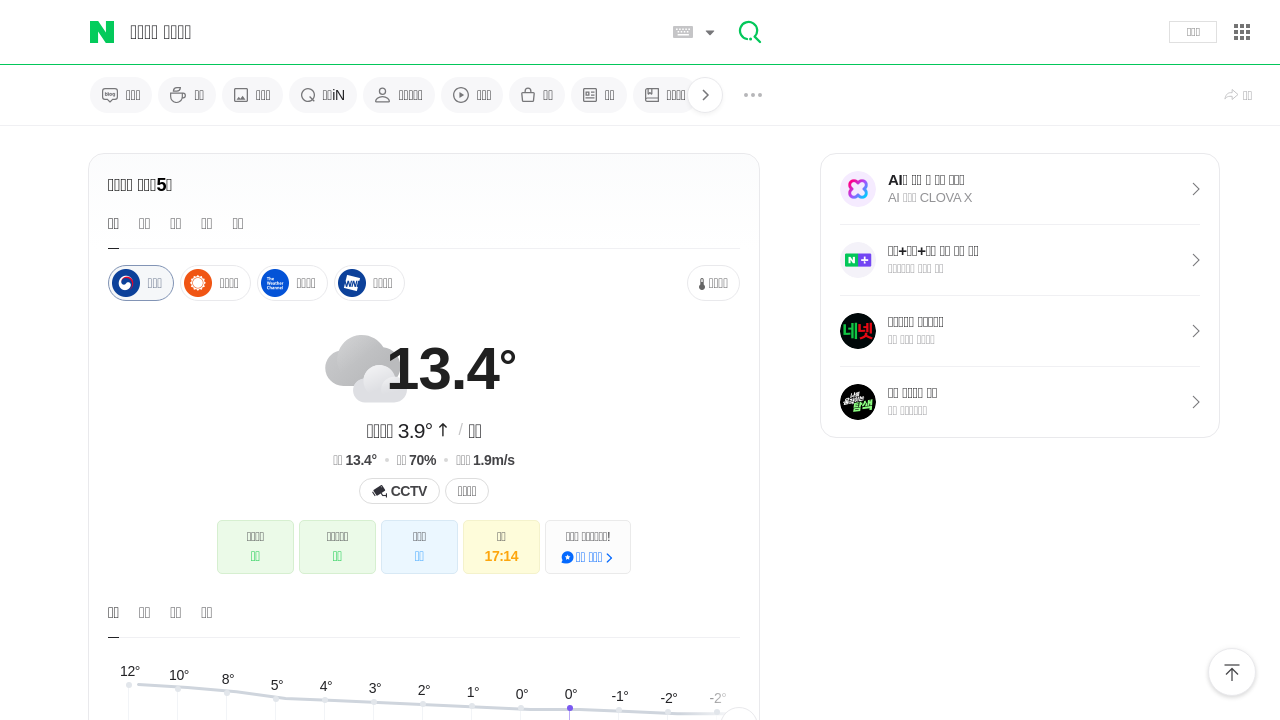

In [ ]:
import base64
from IPython.display import HTML

def display_image(file_path):
    # Read the image file
    with open(file_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode()

    # Create the HTML to display the image
    html = f'<img src="data:image/png;base64,{encoded_string}" />'

    # Display the HTML
    return HTML(html)

# Usage
display_image('screenshot.png')

## Manually Stepping Through the Task

We accomplish this through the following:

- Initialize a browser object
- Use the planner to plan the next steps to take
- Manually execute each step and view responses

In [ ]:
browser = WebBrowser(start_url="http://bing.com/",headless=True) # Change headless to True
model = OpenAIPlannerModel(model="gpt-4o-mini-2024-07-18")
task = "What is the website for the Manning Book - Multi-Agent Systems with AutoGen"

planner = Planner(model=model, web_browser=browser, task=task)

next_actions = await planner.next_actions()
print(next_actions)

2024-12-02 05:00:01.490 | INFO     | interfaceagent.interface.planner:next_actions:70 - WebBrowser not initialized. Initializing now.
2024-12-02 05:00:02.614 | INFO     | interfaceagent.interface.webbrowser:initialize:39 - WebBrowser successfully initialized.
2024-12-02 05:00:03.820 | INFO     | interfaceagent.interface.webbrowser:get_interactive_elements:167 - Total interactive elements found: 1
2024-12-02 05:00:06.557 | INFO     | interfaceagent.interface.planner:next_actions:106 - Next actions: [{'action': 'type', 'selector': "input[type='text']", 'selector_type': 'css', 'value': 'Multi-Agent Systems with AutoGen Manning Book', 'url': ''}, {'action': 'press', 'selector': "input[type='text']", 'selector_type': 'css', 'value': 'Enter', 'url': ''}]


[{'action': 'type', 'selector': "input[type='text']", 'selector_type': 'css', 'value': 'Multi-Agent Systems with AutoGen Manning Book', 'url': ''}, {'action': 'press', 'selector': "input[type='text']", 'selector_type': 'css', 'value': 'Enter', 'url': ''}]


2024-12-02 05:00:21.130 | INFO     | interfaceagent.interface.planner:execute_action:152 - Executing: action='type' selector="input[type='text']" value='Multi-Agent Systems with AutoGen Manning Book'
2024-12-02 05:00:51.181 | ERROR    | interfaceagent.interface.webbrowser:_handle_element_action:107 - Timeout occurred. Current URL: https://www.bing.com/?toWww=1&redig=58104824267047D884682FD54973943D, action: action='type' selector="input[type='text']" value='Multi-Agent Systems with AutoGen Manning Book'
2024-12-02 05:00:51.195 | ERROR    | interfaceagent.interface.webbrowser:_handle_element_action:109 - Page title: Bing



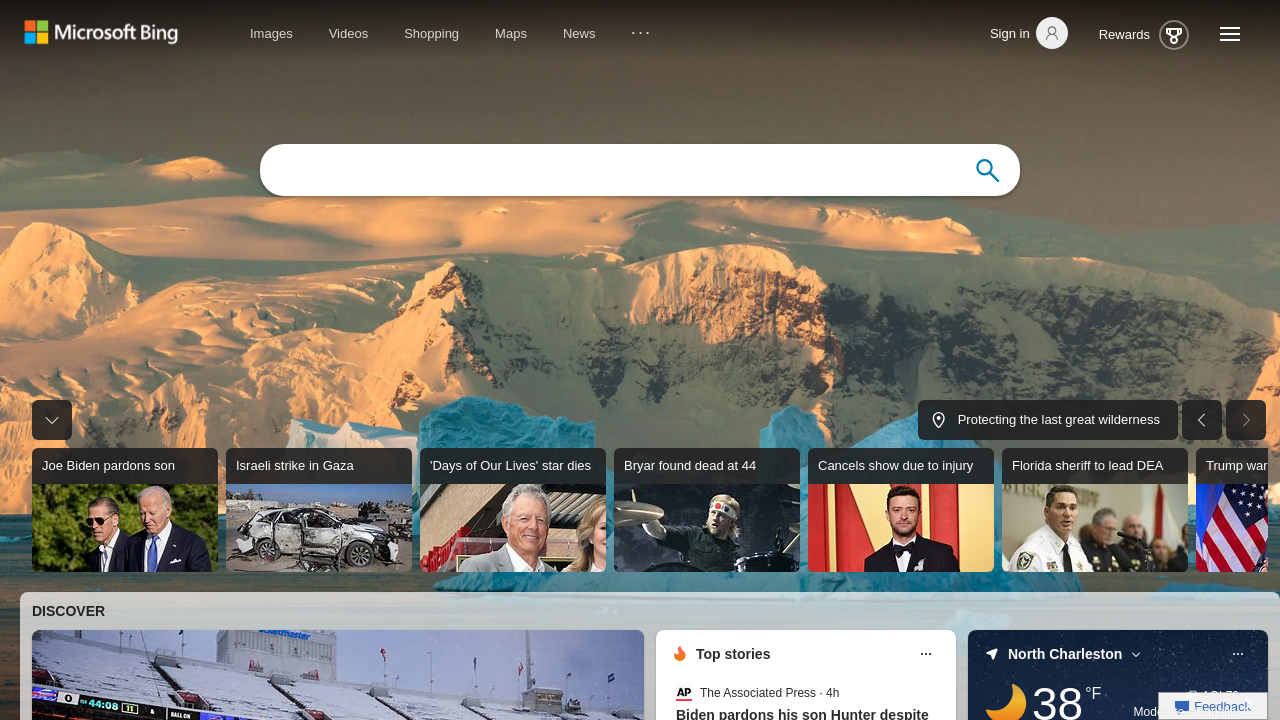

In [ ]:
await planner.execute_action(next_actions[0])
await browser.screenshot("screenshot.png")
display_image('screenshot.png')


2024-12-02 04:52:39.994 | INFO     | interfaceagent.interface.planner:execute_action:152 - Executing: action='type' selector="input[type='text']" value='Multi-Agent Systems with AutoGen'
2024-12-02 04:53:10.016 | ERROR    | interfaceagent.interface.webbrowser:_handle_element_action:107 - Timeout occurred. Current URL: https://www.bing.com/?toWww=1&redig=F3806696C6474091AA7946C65EBE0CF1, action: action='type' selector="input[type='text']" value='Multi-Agent Systems with AutoGen'
2024-12-02 04:53:10.033 | ERROR    | interfaceagent.interface.webbrowser:_handle_element_action:109 - Page title: Microsoft Bing 搜尋
2024-12-02 04:53:10.416 | INFO     | interfaceagent.interface.planner:execute_action:152 - Executing: action='press' selector="input[type='text']" value='Enter'
2024-12-02 04:53:40.437 | ERROR    | interfaceagent.interface.webbrowser:_handle_element_action:107 - Timeout occurred. Current URL: https://www.bing.com/?toWww=1&redig=F3806696C6474091AA7946C65EBE0CF1, action: action='press


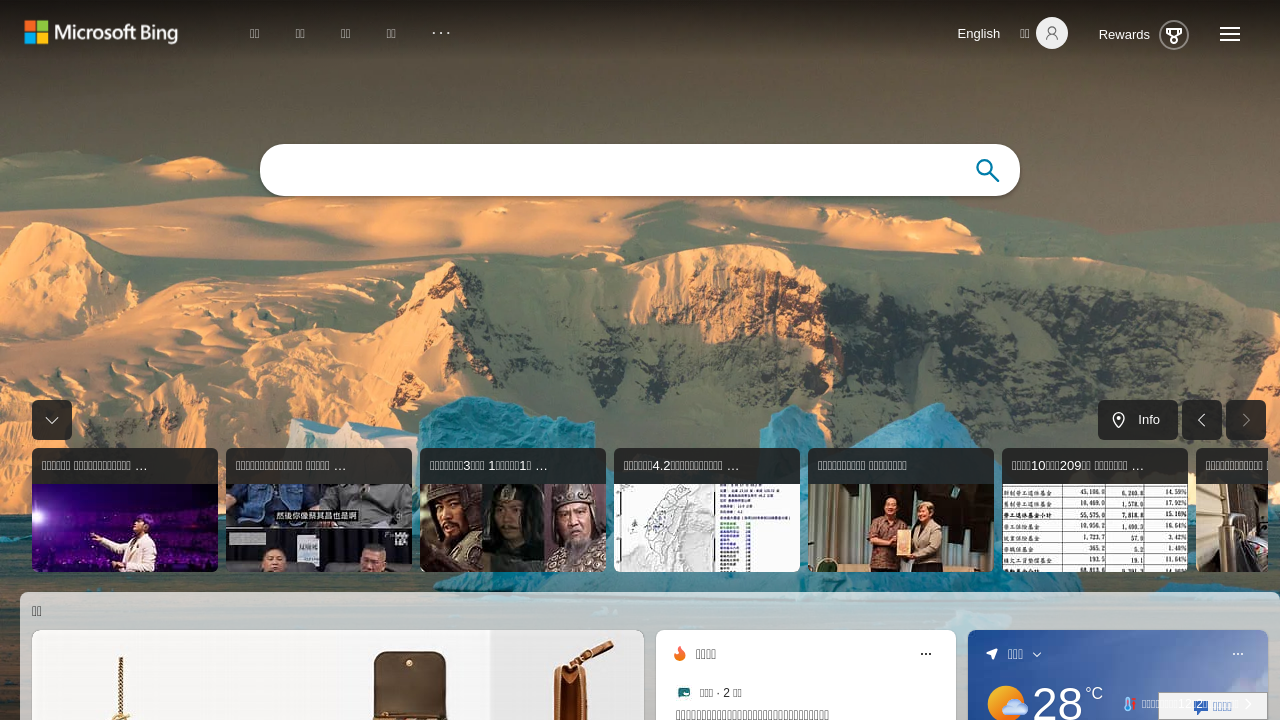

In [ ]:
await planner.execute_action(next_actions[0])
await browser.screenshot("screenshot.png")
await planner.execute_action(next_actions[1])
display_image('screenshot.png')



In [ ]:
await browser.close()